In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# the matplotlib plots will appear directly below the cell in which the plot function was called.
%matplotlib inline

In [2]:
from encodings.aliases import aliases # the encodings module is used to work with character encodings and decoding. The aliases dictionary likely contains mappings or aliases for various character encodings, which can be helpful when dealing with different text encodings in your code. These aliases make it easier to specify and work with character encodings in a more human-readable and convenient way.

In [19]:
#Read in the csv files and remove duplicates
# To find encodings that work
# Below line creates a set of all available encodings
alias_values=set(aliases.values())
for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("Downloads\crime.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

successful hp_roman8
successful cp1256
successful koi8_r
successful iso8859_16
successful iso8859_5
successful mac_iceland
successful cp857
successful iso8859_3
successful latin_1
successful mac_cyrillic
successful kz1048
successful cp1257
successful cp864
successful cp932
successful iso8859_10
successful ptcp154
successful cp1250
successful cp862
successful cp855
successful cp861
successful mac_greek
successful iso8859_13
successful iso8859_14
successful cp1125
successful cp500
successful iso8859_8
successful mac_turkish
successful iso8859_2
successful cp775
successful cp865
successful iso8859_4
successful utf_16_le
successful mac_roman
successful cp866
successful mac_latin2
successful cp437
successful cp1258
successful gbk
successful cp1251
successful cp858
successful cp1026
successful cp1255
successful iso8859_6
successful cp949
successful mbcs
successful iso8859_15
successful cp850
successful cp852
successful cp1140
successful iso8859_9
successful cp037
successful big5hkscs
success

In [23]:
# Read in the crime.csv file and use the timestamp as a datetime index
crime=pd.read_csv("Downloads\crime.csv",encoding="ISO-8859-11")
crime.head()# quick look on how the dataset looks like

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [25]:
crime.shape#check the shape of the dtaframe

(319073, 17)

In [28]:
crime.duplicated().sum()

23

In [29]:
crime.drop_duplicates(inplace=True)# dropping them

In [30]:
crime.shape # Checking the shape again to see if dropping the duplicate rows worked

(319050, 17)

In [31]:
#REAL DATA EXPLORATION
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [36]:
pd.options.display.max_rows=6 #want only 6 rows to be displayed each time I call the dataframe

In [37]:
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [38]:
crime.info()# get a summary about the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long             

In [39]:
#we want to extract date time information ..it is best if the date time is of type datetime
crime.OCCURRED_ON_DATE=pd.to_datetime(crime.OCCURRED_ON_DATE)

In [40]:
crime.info() #!excellent! it has changed to type datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET        

In [42]:
#getting information on numerical columns
crime.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2016.560674,6.609622,13.118176,42.214373,-70.908260
std,1185.308921,0.996312,3.273677,6.294258,2.159845,3.493746
...,...,...,...,...,...,...
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [43]:
crime.describe(include='object') # getting information on non-numeric columns


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [44]:
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [46]:
#check for null values
np.sum(crime.isnull())

INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_CODE_GROUP        0
                      ...  
Lat                   19998
Long                  19998
Location                  0
Length: 17, dtype: int64

In [49]:
#checking for columns with missing values. The not equal to zero means there are indeed missing values
crime.columns[np.sum(crime.isnull())!=0]

Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [50]:
#checking for columns that don't have missing values on the other hand
crime.columns[np.sum(crime.isnull())==0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [51]:
# To check the number of unique values in each column....means we'll have to iterate through each column with a for loop
for column in crime.columns:
    unique_count=crime[column].nunique()
    print(column +"has" +str(unique_count)+ "unique values")

INCIDENT_NUMBERhas282517unique values
OFFENSE_CODEhas222unique values
OFFENSE_CODE_GROUPhas67unique values
OFFENSE_DESCRIPTIONhas244unique values
DISTRICThas12unique values
REPORTING_AREAhas879unique values
SHOOTINGhas1unique values
OCCURRED_ON_DATEhas233229unique values
YEARhas4unique values
MONTHhas12unique values
DAY_OF_WEEKhas7unique values
HOURhas24unique values
UCR_PARThas4unique values
STREEThas4657unique values
Lathas18178unique values
Longhas18178unique values
Locationhas18194unique values


# Lets answer some questions. It's why we are doing exploratory analysis right? Let's find some insights

In [52]:
#what are the most common crimes in terms of offense groups?
crime.OFFENSE_CODE_GROUP.value_counts()

Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
                                             ...  
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: OFFENSE_CODE_GROUP, Length: 67, dtype: int64

In [56]:
#suppose I want the top 10 alone?
crime.OFFENSE_CODE_GROUP.value_counts()[:10]

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
                                   ...  
Vandalism                          15414
Verbal Disputes                    13099
Towed                              11287
Name: OFFENSE_CODE_GROUP, Length: 10, dtype: int64

In [60]:
#We transform these number of common crimes...the top 10 into percentages. ie. a perticular offense code group/total no. of rows * 100
offense_group_values=crime.OFFENSE_CODE_GROUP.value_counts()[:10]
display(offense_group_values/crime.shape[0]*100)

Motor Vehicle Accident Response    11.638301
Larceny                             8.128820
Medical Assistance                  7.378154
                                     ...    
Vandalism                           4.831218
Verbal Disputes                     4.105626
Towed                               3.537690
Name: OFFENSE_CODE_GROUP, Length: 10, dtype: float64

Text(0.5, 1.0, 'top 10 offense groups(as % of all crimes)')

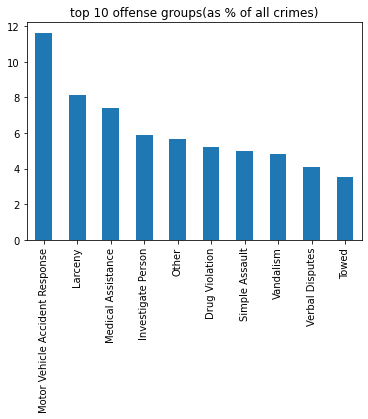

In [75]:
#creating a bar chart of the top ten offense groups
(offense_group_values/crime.shape[0]*100).plot(kind='bar');
plt.title('top 10 offense groups(as % of all crimes)')


In [64]:
#what were the least common offense groups
crime.OFFENSE_CODE_GROUP.value_counts().sort_values(ascending=True)[:10]
# from the ouput, the least were burglary, human trafficking followed by biological threat and so on

Burglary - No Property Taken                  2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE     2
Biological Threat                             2
                                             ..
Explosives                                   27
Phone Call Complaints                        31
Aircraft                                     36
Name: OFFENSE_CODE_GROUP, Length: 10, dtype: int64

In [66]:
# what are the most common offense descriptions?
crime.OFFENSE_DESCRIPTION.value_counts()[:6]

SICK/INJURED/MEDICAL - PERSON            18783
INVESTIGATE PERSON                       18753
M/V - LEAVING SCENE - PROPERTY DAMAGE    16323
VANDALISM                                15153
ASSAULT SIMPLE - BATTERY                 14791
VERBAL DISPUTE                           13099
Name: OFFENSE_DESCRIPTION, dtype: int64

In [71]:
crime.OFFENSE_DESCRIPTION.value_counts().sort_values(ascending=True)[:25]

DRUGS - POSS CLASS D - INTENT MFR DIST DISP    1
PROSTITUTE - COMMON NIGHTWALKER                1
B&E NON-RESIDENCE NIGHT - FORCE                1
                                              ..
AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON     1
KILLING OF FELON BY POLICE                     1
LARCENY IN A BUILDING $50 TO $199              1
Name: OFFENSE_DESCRIPTION, Length: 25, dtype: int64

In [101]:
#as a percentage of total crimes: ofense description/total no. of rows *100
offense_desription_group=crime.OFFENSE_DESCRIPTION.value_counts()[:10]
display(offense_desription_group/crime.shape[0]*100)

SICK/INJURED/MEDICAL - PERSON            5.887165
INVESTIGATE PERSON                       5.877762
M/V - LEAVING SCENE - PROPERTY DAMAGE    5.116126
                                           ...   
INVESTIGATE PROPERTY                     3.486601
LARCENY THEFT FROM BUILDING              2.842501
THREATS TO DO BODILY HARM                2.834039
Name: OFFENSE_DESCRIPTION, Length: 10, dtype: float64

Text(0.5, 1.0, "'top 10 offense description groups(as % of all crimes)'")

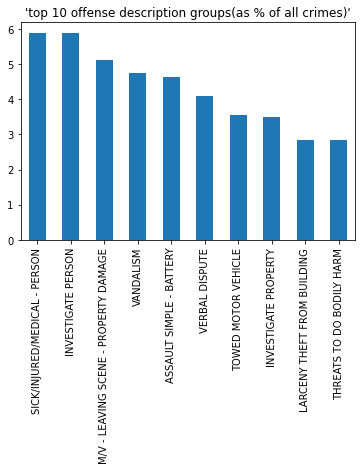

In [102]:
#plot the graph
(offense_desription_group/crime.shape[0]*100).plot(kind='bar')
plt.title("'top 10 offense description groups(as % of all crimes)'")

In [79]:
# In which year were the most crimes committed?
crime.groupby('YEAR').count()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
YEAR,,,,,,,,,,,,,,,,
2015,53371,53371,53371,53371,53243,53371,185,53371,53371,53371,53371,53370,52089,51190,51190,53371
2016,99110,99110,99110,99110,98593,99110,279,99110,99110,99110,99110,99076,93395,92339,92339,99110
2017,100884,100884,100884,100884,100308,100884,370,100884,100884,100884,100884,100845,98153,94059,94059,100884
2018,65685,65685,65685,65685,65141,65685,185,65685,65685,65685,65685,65669,64542,61464,61464,65685


<AxesSubplot:xlabel='YEAR'>

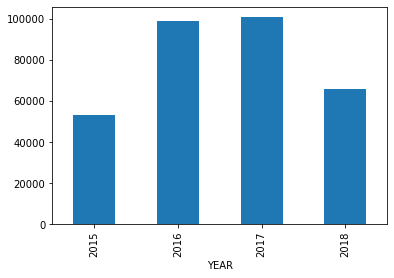

In [80]:
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind='bar')

Text(0.5, 1.0, 'crimes per hour')

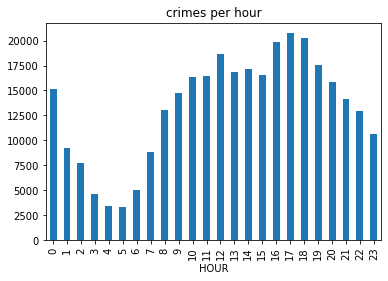

In [85]:
# are there more crimes commited during specific hours?
crime.groupby(['HOUR']).count()['INCIDENT_NUMBER'].plot(kind='bar')
plt.title('crimes per hour')

In [84]:
# On what days and which hours are most crimes committed?
crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER']


HOUR  DAY_OF_WEEK
0     Friday         2161
      Monday         2000
      Saturday       2612
                     ... 
23    Thursday       1492
      Tuesday        1296
      Wednesday      1298
Name: INCIDENT_NUMBER, Length: 168, dtype: int64

In [90]:
#inorder to represent inform of a dataframe we do unstacking
crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()
# Walah!


DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
...,...,...,...,...,...,...,...
21,2089,2003,2077,1902,2070,1925,2043
22,2160,1634,2113,1728,1795,1757,1738
23,1936,1243,1951,1380,1492,1296,1298


In [92]:
#but the day columns are random. So next we rearrange them 
week_hour_day.columns=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [91]:
week_hour_day=crime.groupby(['HOUR','DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

<AxesSubplot:ylabel='HOUR'>

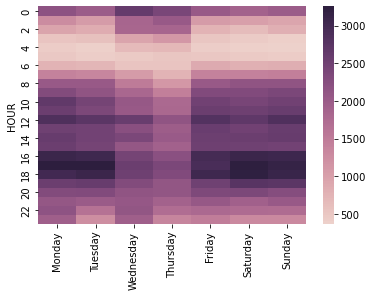

In [94]:
# create a heatmap
sns.heatmap(week_hour_day,cmap=sns.cubehelix_palette(as_cmap=True))
# shows most crimes occur on monday for instance mostly between 5 pm and 6 pm or rather at 5 pm e.t.c

In [95]:
# In which months were the number of crimes below avrage?
# in which month on average did the most crimes occur

In [105]:
# first we find the average value per month
avg_crime=crime.groupby(['YEAR','MONTH']).count()['INCIDENT_NUMBER'].mean()
print("the average number of crime is" + str(avg_crime))
def style_negative(v, props=''):
    return props if v < avg_crime else None
s2 = year_and_month.style.applymap(style_negative, props='color:blue;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s2


# Use apply to highlight the maximum in a column in darkgreen

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkgreen', axis=0)

the average number of crime is7976.25


YEAR,2015,2016,2017,2018
MONTH,,,,
1,nan,7835.000000,7991.000000,7782.000000
2,nan,7307.000000,7408.000000,6937.000000
3,nan,8199.000000,8179.000000,7768.000000
4,nan,8101.000000,8069.000000,7916.000000
5,nan,8578.000000,8715.000000,8906.000000
6,4188.000000,8558.000000,8985.000000,8834.000000
7,8322.000000,8618.000000,9075.000000,8538.000000
8,8340.000000,8938.000000,9206.000000,8337.000000
9,8411.000000,8521.000000,8940.000000,667.000000


it calculates the average number of crimes per month and year using the groupby method. It groups the data by the 'YEAR' and 'MONTH' columns, counts the number of 'INCIDENT_NUMBER' entries in each group, and calculates the mean of these counts. The result is stored in the variable avg_crime.

It prints out the average number of crimes, concatenating it with a string.

It defines a function called style_negative that takes two arguments: v (a value) and props (a string of CSS properties). This function is used to apply a style to a DataFrame cell conditionally. If the value v is less than avg_crime, it applies the provided CSS properties (making the text blue), otherwise, it returns None.

It creates a new DataFrame called s2 by applying the style_negative function to the DataFrame year_and_month. This function is applied to each cell in the DataFrame, and if the condition is met, the specified CSS properties are applied.

It then uses the applymap method again to apply a different set of CSS properties to cells based on a different condition. In this case, if the value v falls within the range (-0.3, 0.3), it applies the 'opacity: 20%;' property to the cell, making it semi-transparent.

Finally, it defines another function called highlight_max, which is intended to highlight the maximum value in each column. It takes a Series s and props (a string of CSS properties) as arguments. It uses NumPy (np.where) to compare each value in the Series to the maximum value (np.nanmax(s.values)) and returns the specified CSS properties if the value matches the maximum.

It applies the highlight_max function to the s2 DataFrame, highlighting the maximum values in each column with white text on a dark green background.

Overall, this code appears to be designed to style and highlight specific cells in a DataFrame based on certain conditions and to visualize data in a more readable and meaningful way. It utilizes conditional styling to emphasize values that meet certain criteria.

In [106]:
year_and_month = crime.groupby(['MONTH','YEAR']).count()['INCIDENT_NUMBER'].unstack()

In [107]:
# Question 4 - In which districts were the most crimes commmitted on yearly basis? 
crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()

YEAR,2015,2016,2017,2018
DISTRICT,,,,
A1,6010,10922,11374,7404
A15,1027,1986,2167,1325
A7,2426,4130,4264,2724
...,...,...,...,...
E13,2800,5558,5514,3662
E18,2740,5223,5611,3773
E5,2157,4017,4309,2755


<AxesSubplot:xlabel='YEAR', ylabel='DISTRICT'>

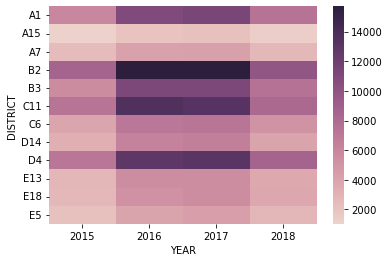

In [109]:
district_and_year=crime.groupby(['DISTRICT', 'YEAR']).count()['INCIDENT_NUMBER'].unstack()
sns.heatmap(district_and_year, cmap=sns.cubehelix_palette(as_cmap=True))

In [110]:
# from the heatmap we conclude that from mid 2015 to mid 2017,most crimes were committed in district B2.
#Also in district E5 the crimes were least on 2018 and 2015.
# Feel free to draw as many conclusions as possible

In [ ]:
Done!!